sunlight < 7: 
- production decrease by 4% for every 10m (138.89 timestamps)

humidity: ideal 60-80%
- production decrease by 2% for every 5% deviation

0.1 seashell per orchid per timestamp for storage

Summarizing trading microstructure of ORCHIDs:
- ConversionObservation (https://imc-prosperity.notion.site/Writing-an-Algorithm-in-Python-658e233a26e24510bfccf0b1df647858#44efb36257b94733887ae00f46a805f1) shows quotes of ORCHID offered by the ducks from South Archipelago
- If you want to purchase 1 unit of ORCHID from the south, you will purchase at the askPrice, pay the TRANSPORT_FEES, IMPORT_TARIFF 
- If you want to sell 1 unit of ORCHID to the south, you will sell at the bidPrice, pay the TRANSPORT_FEES, EXPORT_TARIFF
- You can ONLY trade with the south via the conversion request with applicable conditions as mentioned in the wiki
- For every 1 unit of ORCHID net long position you hold, you will pay 0.1 Seashells per timestamp you hold that position. No storage cost applicable to net short position
- Negative ImportTariff would mean you would receive premium for importing ORCHIDs to your island
- Each Day in ORCHID trading is equivalent to 12 hours on the island. You can assume the ORCHID quality doesn’t deteriorate overnight
- Sunlight unit: Average sunlight per hour is 2500 units. The data/plot shows instantaneous rate of sunlight on any moment of the day

- 1 timestamp = 4.32 seconds

<Axes: >

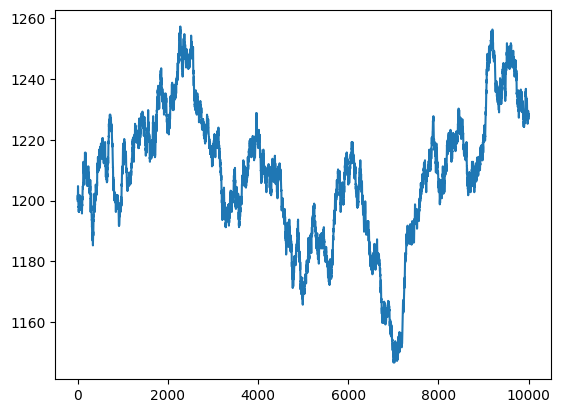

In [475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('d2.csv', sep=';')
df = df.reset_index(drop=True)
df = df.drop('timestamp', axis=1)

df['ORCHIDS'].plot()

<Axes: >

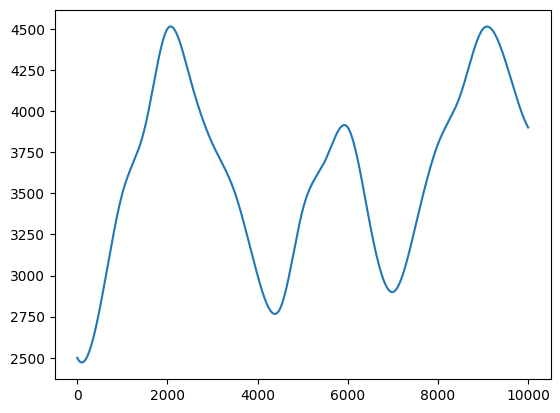

In [476]:
# 7 hours worth of sunlight need over whole day
neededAMT = 2500 * (7/12) * 10000

# 10 minutes worth
incr = 2500 * (1/72) * 10000


df['SUNLIGHT'].plot()


# straight line at neededAMT
# plt.axhline(y=neededAMT, color='r', linestyle='-')

# the bigger the difference, the more scarce it is thus higher price

<Axes: >

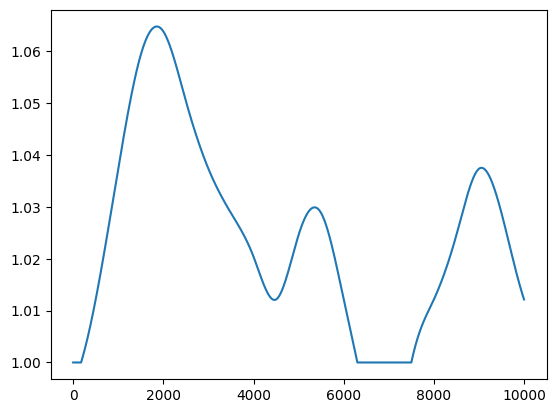

In [477]:
effect = []
for i in range(0, len(df)):
    if df['HUMIDITY'][i] <= 80 and df['HUMIDITY'][i] >= 60:
        effect.append(1)
    elif df['HUMIDITY'][i] < 60:
        effect.append(1 - 0.02 * ((60 - df['HUMIDITY'][i]) / 5))
    else:
        effect.append(1 - 0.02 * ((df['HUMIDITY'][i] - 80) / 5))
        
for i in range(0, len(df)):
    effect[i] = 1 / effect[i]
    
df['EFFECT'] = effect
df['EFFECT'].plot()
# df['SUNLIGHT'] = df['SUNLIGHT'] * df['EFFECT']
# df['SUNLIGHT'].plot()

In [478]:
def error(a, b, c):
    lis = df['SUNLIGHT'].shift(c).tolist()
    for i in range(c, len(lis)):
        x = lis[i]
        x = x / a + b
        lis[i] = x
    return np.sum(np.abs(df['ORCHIDS'] - lis))

import skopt
from skopt import gp_minimize
from skopt.space import Real
from skopt.space import Integer
from skopt.utils import use_named_args

space  = [Real(20, 25, name='a'),
          Real(1000, 1200, name='b'),
          Integer(0, 1000, name='c')]

@use_named_args(space)
def objective(a, b, c):
    return error(a, b, c)

# res = gp_minimize(objective, space, n_calls=300, random_state=0, x0=[25, 1068.5380691087198, 229], verbose=True)
# print(res.x)
# print(res.fun)


<Axes: >

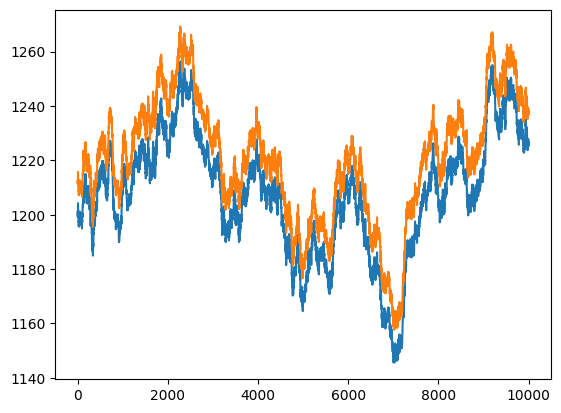

In [479]:
buyCost = []
for i in range(0, len(df)):
    buyCost.append(df['ORCHIDS'][i] + df['IMPORT_TARIFF'][i] + df['TRANSPORT_FEES'][i])
df['BUY_COST'] = buyCost

sellCost = []
for i in range(0, len(df)):
    sellCost.append(df['ORCHIDS'][i] + df['EXPORT_TARIFF'][i] + df['TRANSPORT_FEES'][i])
df['SELL_COST'] = sellCost

df['BUY_COST'].plot()
df['SELL_COST'].plot()